In [19]:
import numpy as np
from scipy.stats import bootstrap, norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks")

In [20]:
df = pd.read_csv("results.csv")
df.loc[:, ["vis", "error"]].groupby(["vis"]).mean()

df_bar = df[df["vis"] == "bar"]
df_pie = df[df["vis"] == "pie"]
df_tree = df[df["vis"] == "treemap"]

In [21]:
bs_bar = bootstrap((df_bar.error,), np.median, confidence_level=0.95, method="percentile")
bs_pie = bootstrap((df_pie.error,), np.median, confidence_level=0.95, method="percentile")
bs_tree = bootstrap((df_tree.error,), np.median, confidence_level=0.95, method="percentile")

print(bs_bar.confidence_interval)
print(bs_pie.confidence_interval)
print(bs_tree.confidence_interval)

ConfidenceInterval(low=0.1699250014423123, high=1.087462841250339)
ConfidenceInterval(low=1.6438561897747248, high=2.0443941193584534)
ConfidenceInterval(low=2.357552004618084, high=2.8328900141647417)


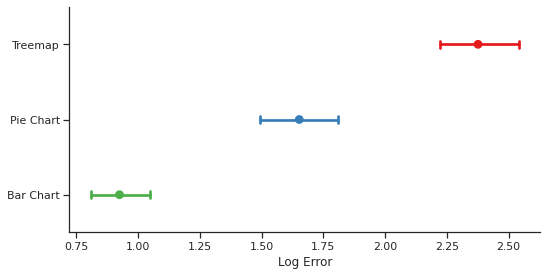

In [24]:
df["vis"] = df["vis"].replace({"bar": "Bar Chart", "pie": "Pie Chart", "treemap": "Treemap"})
sns.catplot(x="error", y="vis", data=df, kind="point", join=False, capsize=0.1, ci=95, bootstrap=True, n_boot=1000, palette="Set1", height=4, aspect=2)
plt.xlabel("Log Error")
plt.ylabel("")
plt.show()